In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv("df_q_leverage.csv")

In [50]:
df.drop(df.columns[1], axis=1, inplace=True)

In [51]:
dfval = df.fillna(-1).values
num_row = dfval.shape[0]
top_50s = []
bottom_50s = []
market_300 = []

for date in range(2, dfval.shape[1]):

    col = dfval[:, [0,date]]
    num_nan = np.sum(col[:,1] < 0)
    sorted_x = np.array(sorted(list(col), key=lambda x: -x[1]))
    
    top_50s.append(np.array(sorted_x[:100])[:,0])
    bottom_50s.append(np.array(sorted_x[num_row-num_nan-100:num_row-num_nan])[:,0])
    market_300.append(np.array(sorted_x[:330])[:,0])

In [52]:
dates = [x[:-7] + x[-4:] for x in df.columns.values[3:]]
tops = np.array(top_50s)
bottoms = np.array(bottom_50s)
markets = np.array(market_300)

In [53]:
tops[len(dates)]

array(['ACN US  EQUITY', 'ALGN US  EQUITY', 'GOOGL US  EQUITY',
       'GOOG US  EQUITY', 'ANSS US  EQUITY', 'CMG US  EQUITY',
       'CTSH US  EQUITY', 'RE US  EQUITY', 'EXPD US  EQUITY',
       'FFIV US  EQUITY', 'FL US  EQUITY', 'BEN US  EQUITY',
       'INCY US  EQUITY', 'ISRG US  EQUITY', 'PAYX US  EQUITY',
       'REGN US  EQUITY', 'RHI US  EQUITY', 'SWKS US  EQUITY',
       'TROW US  EQUITY', 'TTWO US  EQUITY', 'TRIP US  EQUITY',
       'ULTA US  EQUITY', 'VAR US  EQUITY', 'VRTX US  EQUITY',
       'CERN US  EQUITY', 'CINF US  EQUITY', 'HRL US  EQUITY',
       'HP US  EQUITY', 'MU US  EQUITY', 'ROST US  EQUITY',
       'AOS US  EQUITY', 'PYPL US  EQUITY', 'SNPS US  EQUITY',
       'NKTR US  EQUITY', 'BLK US  EQUITY', 'INTU US  EQUITY',
       'PSA US  EQUITY', 'QRVO US  EQUITY', 'NWSA US  EQUITY',
       'NWS US  EQUITY', 'CME US  EQUITY', 'EA US  EQUITY',
       'PXD US  EQUITY', 'EW US  EQUITY', 'XOM US  EQUITY',
       'NOV US  EQUITY', 'AYI US  EQUITY', 'BHGE US  EQUITY',
  

In [54]:
bottoms[len(dates)]

array(['DISCA US  EQUITY', 'DISCK US  EQUITY', 'SYF US  EQUITY',
       'CHTR US  EQUITY', 'VNO US  EQUITY', 'DISH US  EQUITY',
       'BK US  EQUITY', 'PCG US  EQUITY', 'EXR US  EQUITY',
       'MO US  EQUITY', 'MTD US  EQUITY', 'NOC US  EQUITY',
       'CTL US  EQUITY', 'ORCL US  EQUITY', 'WHR US  EQUITY',
       'BLL US  EQUITY', 'PPL US  EQUITY', 'KR US  EQUITY',
       'NFLX US  EQUITY', 'ETR US  EQUITY', 'DVA US  EQUITY',
       'GIS US  EQUITY', 'MCHP US  EQUITY', 'AVY US  EQUITY',
       'VZ US  EQUITY', 'GE US  EQUITY', 'AIV US  EQUITY',
       'ALLE US  EQUITY', 'PEP US  EQUITY', 'JWN US  EQUITY',
       'STX US  EQUITY', 'ITW US  EQUITY', 'KO US  EQUITY',
       'IBM US  EQUITY', 'DFS US  EQUITY', 'GM US  EQUITY',
       'CMS US  EQUITY', 'SHW US  EQUITY', 'CAT US  EQUITY',
       'FISV US  EQUITY', 'GGP US  EQUITY', 'AMGN US  EQUITY',
       'NLSN US  EQUITY', 'AXP US  EQUITY', 'K US  EQUITY',
       'C US  EQUITY', 'FE US  EQUITY', 'LOW US  EQUITY',
       'AES US  EQUITY'

Post Financial Crisis: 2010 - 2018

In [55]:
df_pe = pd.read_csv('spy_pe.csv')

In [56]:
df_tot_return = pd.read_csv('spy_total_return_indx.csv')
mkt_cap = pd.read_csv('spy_market_cap_more.csv')
df_pb = pd.read_csv('mod_spy_pb.csv')

In [57]:
#df_tot_return = pd.read_csv('mod_total_return.csv')

In [58]:
new_dates = mkt_cap.columns.values
mkt_cap = mkt_cap.rename(index=str, columns={x:x[:-7]+x[-4:] for x in new_dates})
df_pb = df_pb.rename(index=str, columns={x:x[:-7]+x[-4:] for x in new_dates})
df_pe = df_pe.rename(index=str, columns={x:x[:-7]+x[-4:] for x in new_dates})

In [59]:
df_tot_return = df_tot_return.rename(index=str, columns={x:x[:-7]+x[-4:] for x in new_dates})

In [60]:
df_pe = df_pe.rename(index=str, columns={x:x[:-7]+x[-4:] for x in new_dates})

In [61]:
result_top = []
result_bottom = []
result_market = []
result_topPB = []
result_bottomPB = []
result_topPE = []
result_bottomPE = []

for i in range(len(dates) - 36, len(dates)):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    result_top.append((returns * percent / percent.sum()).sum())    


In [62]:
dates[len(dates) - 36]

'3/2010'

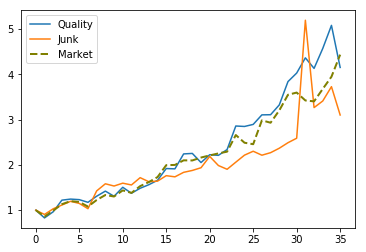

In [63]:
for i in range(len(dates) - 36, len(dates)):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    result_bottom.append((returns * percent / percent.sum()).sum())
    
for i in range(len(dates) - 36, len(dates)):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[markets[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[markets[i]][dates[i]]
    result_market.append((returns * percent / percent.sum()).sum())

for i in range(len(result_top)):
    denominator = result_top[0]
    result_top[:] = result_top[:]/denominator
    
for i in range(len(result_market)):
    denominator = result_market[0]
    result_market[:] = result_market[:]/denominator
    
for i in range(len(result_bottom)):
    denominator = result_bottom[0]
    result_bottom[:] = result_bottom[:]/denominator    
    
plt.plot(result_top, label='Quality')
plt.plot(result_bottom, label='Junk')
plt.plot(result_market, label='Market', marker = '', color = 'olive', linewidth=2, linestyle='dashed')
plt.legend()

In [64]:
result_18 = pd.DataFrame({'Quality':result_top[:],'Market':result_market[:], 'Junk':result_bottom[:]})
result_18.to_csv('result_18_lev.csv')

In [65]:
for i in range(len(dates)-36, len(dates)):
    PB = df_pb.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    result_topPB.append((PB * percent / percent.sum()).sum())
    
for i in range(len(dates)-36, len(dates)):
    PB = df_pb.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    result_bottomPB.append((PB * percent / percent.sum()).sum())

KeyError: "None of [['ATVI US  EQUITY' 'ALGN US  EQUITY' 'GOOGL US  EQUITY' 'GOOG US  EQUITY'\n 'AAPL US  EQUITY' 'ADSK US  EQUITY' 'CHRW US  EQUITY' 'CBOE US  EQUITY'\n 'CELG US  EQUITY' 'CTXS US  EQUITY' 'CTSH US  EQUITY' 'EBAY US  EQUITY'\n 'EA US  EQUITY' 'EXPD US  EQUITY' 'FFIV US  EQUITY' 'FAST US  EQUITY'\n 'GPS US  EQUITY' 'GRMN US  EQUITY' 'ISRG US  EQUITY' 'JNPR US  EQUITY'\n 'PAYX US  EQUITY' 'RHT US  EQUITY' 'REGN US  EQUITY' 'CRM US  EQUITY'\n 'SNPS US  EQUITY' 'TROW US  EQUITY' 'TXN US  EQUITY' 'TRIP US  EQUITY'\n 'MNST US  EQUITY' 'ACN US  EQUITY' 'RHI US  EQUITY' 'V US  EQUITY'\n 'TSCO US  EQUITY' 'CF US  EQUITY' 'SYK US  EQUITY' 'CMG US  EQUITY'\n 'MA US  EQUITY' 'ADP US  EQUITY' 'QCOM US  EQUITY' 'NVDA US  EQUITY'\n 'ALXN US  EQUITY' 'TPR US  EQUITY' 'VAR US  EQUITY' 'AMAT US  EQUITY'\n 'LRCX US  EQUITY' 'FLR US  EQUITY' 'PWR US  EQUITY' 'JEC US  EQUITY'\n 'BEN US  EQUITY' 'FLIR US  EQUITY' 'UAA US  EQUITY' 'UA US  EQUITY'\n 'INTC US  EQUITY' 'PSA US  EQUITY' 'NKE US  EQUITY' 'NOV US  EQUITY'\n 'PBCT US  EQUITY' 'FL US  EQUITY' 'AMZN US  EQUITY' 'CERN US  EQUITY'\n 'EW US  EQUITY' 'KMX US  EQUITY' 'XOM US  EQUITY' 'OXY US  EQUITY'\n 'RL US  EQUITY' 'IVZ US  EQUITY' 'SWKS US  EQUITY' 'WDC US  EQUITY'\n 'AKAM US  EQUITY' 'CVX US  EQUITY' 'RMD US  EQUITY' 'BKNG US  EQUITY'\n 'CME US  EQUITY' 'HSIC US  EQUITY' 'ICE US  EQUITY' 'VRTX US  EQUITY'\n 'GLW US  EQUITY' 'MSFT US  EQUITY' 'ROST US  EQUITY' 'FDX US  EQUITY'\n 'TMO US  EQUITY' 'ULTA US  EQUITY' 'ADI US  EQUITY' 'IPGP US  EQUITY'\n 'WBA US  EQUITY' 'HRL US  EQUITY' 'RE US  EQUITY' 'CMI US  EQUITY'\n 'MOS US  EQUITY' 'ANSS US  EQUITY' 'XLNX US  EQUITY' 'CB US  EQUITY'\n 'BIIB US  EQUITY' 'HP US  EQUITY' 'CINF US  EQUITY' 'GILD US  EQUITY'\n 'SBUX US  EQUITY' 'TSS US  EQUITY' 'DLTR US  EQUITY' 'AMP US  EQUITY']] are in the [index]"

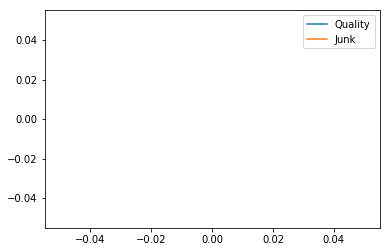

In [66]:
plt.plot(result_topPB, label='Quality')
plt.plot(result_bottomPB, label='Junk')
plt.legend()

In [67]:
for i in range(len(dates)-36, len(dates)):
    PE = df_pe.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    result_topPE.append((PE).sum())
    
for i in range(len(dates)-36, len(dates)):
    PE = df_pb.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    result_bottomPE.append((PE).sum())

KeyError: "None of [['AVB US  EQUITY' 'IFF US  EQUITY' 'BXP US  EQUITY' 'DTE US  EQUITY'\n 'AEP US  EQUITY' 'PPL US  EQUITY' 'PHM US  EQUITY' 'ETR US  EQUITY'\n 'WM US  EQUITY' 'VNO US  EQUITY' 'USB US  EQUITY' 'AWK US  EQUITY'\n 'ES US  EQUITY' 'WEC US  EQUITY' 'NI US  EQUITY' 'WY US  EQUITY'\n 'MYL US  EQUITY' 'NWL US  EQUITY' 'MAS US  EQUITY' 'SCG US  EQUITY'\n 'WFC US  EQUITY' 'DVA US  EQUITY' 'IP US  EQUITY' 'ESS US  EQUITY'\n 'DG US  EQUITY' 'NEE US  EQUITY' 'FRT US  EQUITY' 'EXR US  EQUITY'\n 'AIG US  EQUITY' 'WRK US  EQUITY' 'IRM US  EQUITY' 'STZ US  EQUITY'\n 'LB US  EQUITY' 'KMI US  EQUITY' 'D US  EQUITY' 'KR US  EQUITY'\n 'MTB US  EQUITY' 'CMA US  EQUITY' 'BLL US  EQUITY' 'FE US  EQUITY'\n 'EQR US  EQUITY' 'MCO US  EQUITY' 'BBT US  EQUITY' 'JWN US  EQUITY'\n 'M US  EQUITY' 'MAR US  EQUITY' 'HSY US  EQUITY' 'MAC US  EQUITY'\n 'ALK US  EQUITY' 'K US  EQUITY' 'AES US  EQUITY' 'NKTR US  EQUITY'\n 'NTRS US  EQUITY' 'UDR US  EQUITY' 'CMS US  EQUITY' 'PM US  EQUITY'\n 'HOG US  EQUITY' 'AMD US  EQUITY' 'GT US  EQUITY' 'MO US  EQUITY'\n 'YUM US  EQUITY' 'ETFC US  EQUITY' 'CPB US  EQUITY' 'STT US  EQUITY'\n 'MAA US  EQUITY' 'NLSN US  EQUITY' 'IT US  EQUITY' 'SPG US  EQUITY'\n 'TXT US  EQUITY' 'AIV US  EQUITY' 'CAT US  EQUITY' 'JPM US  EQUITY'\n 'AMT US  EQUITY' 'BAC US  EQUITY' 'MGM US  EQUITY' 'GE US  EQUITY'\n 'ADS US  EQUITY' 'AAL US  EQUITY' 'AXP US  EQUITY' 'AZO US  EQUITY'\n 'BA US  EQUITY' 'CDNS US  EQUITY' 'CBRE US  EQUITY' 'CNP US  EQUITY'\n 'CHTR US  EQUITY' 'C US  EQUITY' 'DE US  EQUITY' 'DAL US  EQUITY'\n 'DISH US  EQUITY' 'F US  EQUITY' 'GGP US  EQUITY' 'GS US  EQUITY'\n 'HBI US  EQUITY' 'INCY US  EQUITY' 'MS US  EQUITY' 'SBAC US  EQUITY'\n 'CLX US  EQUITY' 'TDG US  EQUITY' 'URI US  EQUITY' 'WU US  EQUITY']] are in the [index]"

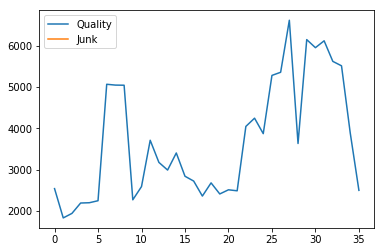

In [68]:
plt.plot(result_topPE, label='Quality')
plt.plot(result_bottomPE, label='Junk')
plt.legend()

2003-2009

In [69]:
dates[len(dates) - 36]
dates[len(dates) - 64]

'3/2003'

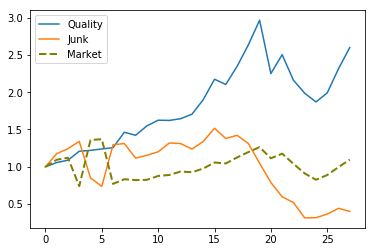

In [70]:
result_top = []
result_bottom = []
result_market = []
result_topPB = []
result_bottomPB = []

for i in range(len(dates) - 64, len(dates) - 36):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    result_top.append((returns * percent / percent.sum()).sum())    

for i in range(len(dates) - 64, len(dates) - 36):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    result_bottom.append((returns * percent / percent.sum()).sum())
    
for i in range(len(dates) - 64, len(dates) - 36):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[markets[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[markets[i]][dates[i]]
    result_market.append((returns * percent / percent.sum()).sum())
    
for i in range(len(result_top)):
    denominator = result_top[0]
    result_top[:] = result_top[:]/denominator
    
for i in range(len(result_market)):
    denominator = result_market[0]
    result_market[:] = result_market[:]/denominator
    
for i in range(len(result_bottom)):
    denominator = result_bottom[0]
    result_bottom[:] = result_bottom[:]/denominator
    
plt.plot(result_top, label='Quality')
plt.plot(result_bottom, label='Junk')
plt.plot(result_market, label='Market', marker = '', color = 'olive', linewidth=2, linestyle='dashed')
plt.legend()

In [71]:
result_09 = pd.DataFrame({'Quality':result_top[:],'Market':result_market[:], 'Junk':result_bottom[:]})
result_09.to_csv('result_09_lev.csv')

In [43]:
for i in range(len(dates) - 64, len(dates) - 36):
    PB = df_pb.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    result_topPB.append((PB * percent / percent.sum()).sum())
    
for i in range(len(dates) - 64, len(dates) - 36):
    PB = df_pb.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    result_bottomPB.append((PB * percent / percent.sum()).sum())
    
plt.plot(result_topPB, label='top')
plt.plot(result_bottomPB, label='bottom')
plt.legend()

KeyError: "None of [['ADBE US  EQUITY' 'ANSS US  EQUITY' 'ADSK US  EQUITY' 'BLK US  EQUITY'\n 'BKNG US  EQUITY' 'CHRW US  EQUITY' 'CNC US  EQUITY' 'CSCO US  EQUITY'\n 'CTSH US  EQUITY' 'EA US  EQUITY' 'FFIV US  EQUITY' 'FAST US  EQUITY'\n 'FLIR US  EQUITY' 'GRMN US  EQUITY' 'KLAC US  EQUITY' 'MCHP US  EQUITY'\n 'MSFT US  EQUITY' 'MCO US  EQUITY' 'PAYX US  EQUITY' 'VRSN US  EQUITY'\n 'WBA US  EQUITY' 'XLNX US  EQUITY' 'SNPS US  EQUITY' 'TSS US  EQUITY'\n 'CELG US  EQUITY' 'TTWO US  EQUITY' 'EXPD US  EQUITY' 'IDXX US  EQUITY'\n 'RHI US  EQUITY' 'SBUX US  EQUITY' 'NTAP US  EQUITY' 'EBAY US  EQUITY'\n 'CME US  EQUITY' 'INTU US  EQUITY' 'WAT US  EQUITY' 'MYL US  EQUITY'\n 'ADP US  EQUITY' 'GPN US  EQUITY' 'HOLX US  EQUITY' 'NFLX US  EQUITY'\n 'FLR US  EQUITY' 'PRGO US  EQUITY' 'PSA US  EQUITY' 'MNST US  EQUITY'\n 'QCOM US  EQUITY' 'CDNS US  EQUITY' 'INTC US  EQUITY' 'SIVB US  EQUITY'\n 'ROST US  EQUITY' 'ACN US  EQUITY' 'TROW US  EQUITY' 'ISRG US  EQUITY'\n 'RHT US  EQUITY' 'LB US  EQUITY' 'ORCL US  EQUITY' 'DLTR US  EQUITY'\n 'HD US  EQUITY' 'XEC US  EQUITY' 'MU US  EQUITY' 'GWW US  EQUITY'\n 'AAPL US  EQUITY' 'AMAT US  EQUITY' 'ALGN US  EQUITY' 'JEC US  EQUITY'\n 'CINF US  EQUITY' 'TXN US  EQUITY' 'VAR US  EQUITY' 'EVHC US  EQUITY'\n 'SJM US  EQUITY' 'TPR US  EQUITY' 'XOM US  EQUITY' 'BEN US  EQUITY'\n 'COL US  EQUITY' 'AMGN US  EQUITY' 'JNJ US  EQUITY' 'TSCO US  EQUITY'\n 'KMX US  EQUITY' 'RE US  EQUITY' 'AFL US  EQUITY' 'CVS US  EQUITY'\n 'COST US  EQUITY' 'HP US  EQUITY' 'EL US  EQUITY' 'A US  EQUITY'\n 'HPQ US  EQUITY' 'AGN US  EQUITY' 'AET US  EQUITY' 'ITW US  EQUITY'\n 'MON US  EQUITY' 'ALL US  EQUITY' 'TMK US  EQUITY' 'FDX US  EQUITY'\n 'NKE US  EQUITY' 'SPGI US  EQUITY' 'SWKS US  EQUITY' 'GD US  EQUITY'\n 'XL US  EQUITY' 'PFG US  EQUITY' 'HSIC US  EQUITY' 'PEP US  EQUITY']] are in the [index]"

2000 - 2002

In [44]:
dates[len(dates)-76]

'3/2000'

In [45]:
tops.shape

(94, 100)

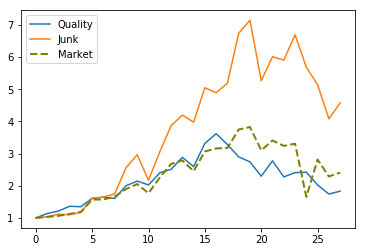

In [46]:
result_top = []
result_bottom = []
result_market = []
result_topPB = []
result_bottomPB = []

for i in range(len(dates)-92, len(dates)-64):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    percent = percent.astype(float)
    result_top.append((returns * percent / percent.sum()).sum())

for i in range(len(dates)-92, len(dates)-64):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    percent = percent.astype(float)
    result_bottom.append((returns * percent / percent.sum()).sum())
    
for i in range(len(dates)-92, len(dates)-64):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[markets[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[markets[i]][dates[i]]
    percent = percent.astype(float)
    result_market.append((returns * percent / percent.sum()).sum())
    
for i in range(len(result_top)):
    denominator = result_top[0]
    result_top[:] = result_top[:]/denominator
    
for i in range(len(result_market)):
    denominator = result_market[0]
    result_market[:] = result_market[:]/denominator
    
for i in range(len(result_bottom)):
    denominator = result_bottom[0]
    result_bottom[:] = result_bottom[:]/denominator
    
plt.plot(result_top, label='Quality')
plt.plot(result_bottom, label='Junk')
plt.plot(result_market, label='Market', marker = '', color = 'olive', linewidth=2, linestyle='dashed')
plt.legend()

In [47]:
result_00 = pd.DataFrame({'Quality':result_top[:],'Market':result_market[:], 'Junk':result_bottom[:]})
result_00.to_csv('result_00_lev.csv')